## **Importing Libraries**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

## **Reading the uploaded CSV file**

In [3]:
file_path = '/content/input/Weather_Data.csv'  # Adjust the path if the file is located elsewhere
weather_data = pd.read_csv(file_path)

## **Dataset Head Loading (First 5 Records)**

In [4]:
print(weather_data.head())

   ID     City  Temperature_C        Date
0   1  Sahiwal             43  2024-07-01
1   2  Sahiwal             43  2024-07-02
2   3  Sahiwal             42  2024-07-03
3   4  Sahiwal             45  2024-07-04
4   5  Sahiwal             45  2024-07-05


## **Summary of statistics for numerical columns in Dataset**

In [5]:
weather_data.describe()

,ID,Temperature_C
count,124.000000,124.000000
mean,62.500000,42.975806
std,35.939764,1.370204
min,1.000000,41.000000
25%,31.750000,42.000000
50%,62.500000,43.000000
75%,93.250000,44.000000
max,124.000000,45.000000


In [6]:
weather_data.columns

Index(['ID', 'City', 'Temperature_C', 'Date'], dtype='object')

## **Dataset Dimensions (number of rows and columns)**

In [7]:
weather_data.shape

(124, 4)

## **Dataset Filtering**

In [8]:
weather_data[weather_data['City'] == 'Sahiwal']

,ID,City,Temperature_C,Date
0,1,Sahiwal,43,2024-07-01
1,2,Sahiwal,43,2024-07-02
2,3,Sahiwal,42,2024-07-03
3,4,Sahiwal,45,2024-07-04
4,5,Sahiwal,45,2024-07-05
...,...,...,...,...
57,58,Sahiwal,43,2024-08-27
58,59,Sahiwal,45,2024-08-28
59,60,Sahiwal,43,2024-08-29
60,61,Sahiwal,41,2024-08-30


# **Data Visualization**

In [9]:
weather_data.groupby('City')['Temperature_C'].mean()

,Temperature_C
City,
Okara,42.887097
Sahiwal,43.064516


## **Hottest Days**

In [19]:
max_temperature = weather_data['Temperature_C'].max()

hottest_days = weather_data[weather_data['Temperature_C'] == max_temperature]

print(hottest_days)

      ID     City  Temperature_C        Date   Month
3      4  Sahiwal             45  2024-07-04    July
4      5  Sahiwal             45  2024-07-05    July
19    20  Sahiwal             45  2024-07-20    July
24    25  Sahiwal             45  2024-07-25    July
29    30  Sahiwal             45  2024-07-30    July
32    33  Sahiwal             45  2024-08-02  August
36    37  Sahiwal             45  2024-08-06  August
41    42  Sahiwal             45  2024-08-11  August
52    53  Sahiwal             45  2024-08-22  August
55    56  Sahiwal             45  2024-08-25  August
56    57  Sahiwal             45  2024-08-26  August
58    59  Sahiwal             45  2024-08-28  August
62    63    Okara             45  2024-07-01    July
75    76    Okara             45  2024-07-14    July
78    79    Okara             45  2024-07-17    July
79    80    Okara             45  2024-07-18    July
92    93    Okara             45  2024-07-31    July
95    96    Okara             45  2024-08-03  

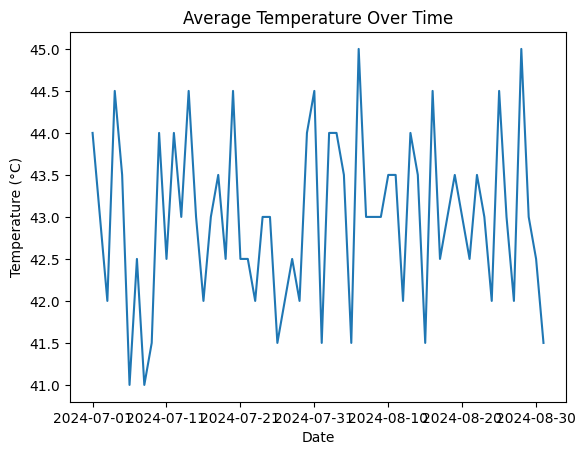

In [11]:

weather_data.groupby('Date')['Temperature_C'].mean().plot(kind='line')
plt.title('Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()


## **Avereage Temprature Line**

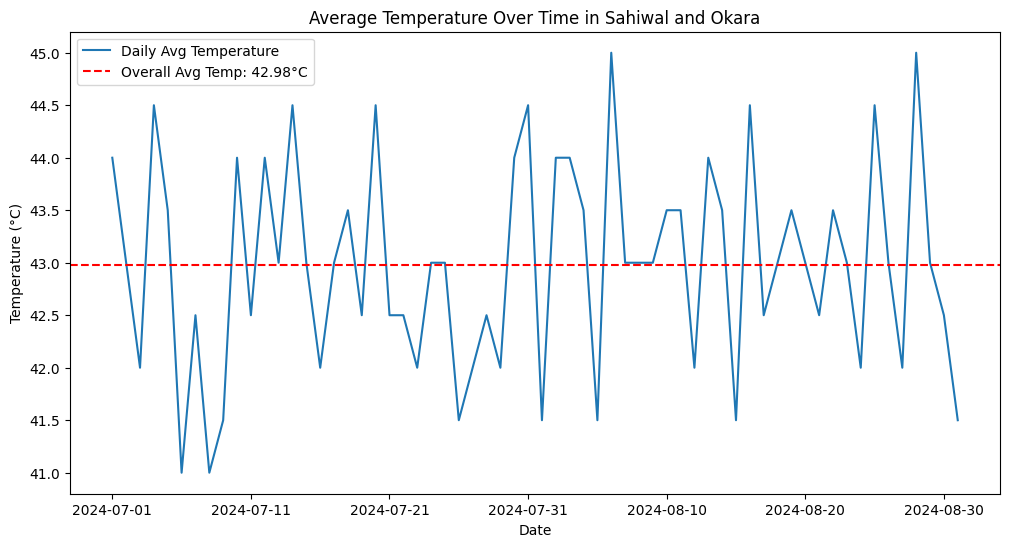

In [15]:
average_temp = weather_data['Temperature_C'].mean()

plt.figure(figsize=(12, 6))
weather_data.groupby('Date')['Temperature_C'].mean().plot(kind='line', label='Daily Avg Temperature')

plt.axhline(y=average_temp, color='red', linestyle='--', label=f'Overall Avg Temp: {average_temp:.2f}°C')

plt.title('Average Temperature Over Time in Sahiwal and Okara')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.show()



## **Plot the graph with the highest temperature highlighted**

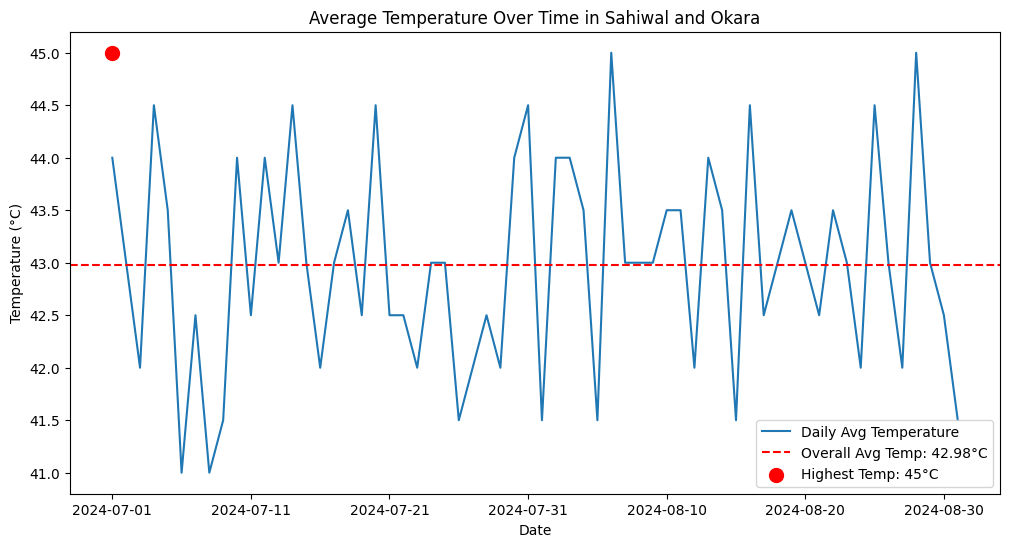

In [16]:
# Finding the date and temperature of the highest temperature recorded
max_temp_row = weather_data.loc[weather_data['Temperature_C'].idxmax()]
max_temp_date = max_temp_row['Date']
max_temp_value = max_temp_row['Temperature_C']

plt.figure(figsize=(12, 6))
weather_data.groupby('Date')['Temperature_C'].mean().plot(kind='line', label='Daily Avg Temperature')

plt.axhline(y=average_temp, color='red', linestyle='--', label=f'Overall Avg Temp: {average_temp:.2f}°C')

plt.scatter(max_temp_date, max_temp_value, color='red', s=100, zorder=5, label=f'Highest Temp: {max_temp_value}°C')

plt.title('Average Temperature Over Time in Sahiwal and Okara')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.show()

## **Monthly Temperature Trends**

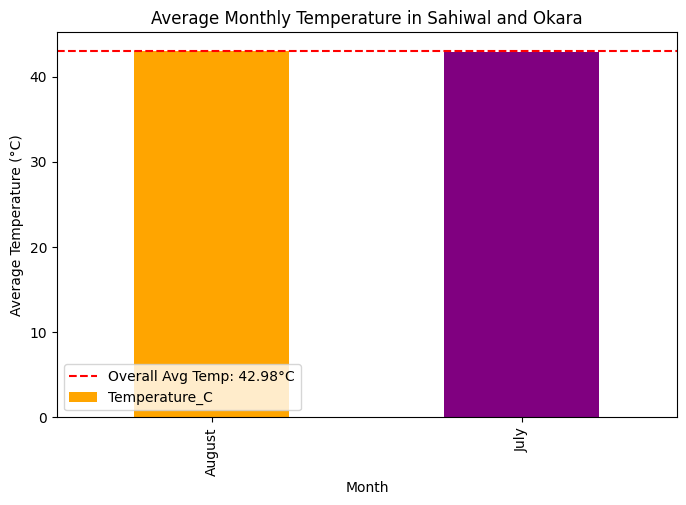

In [17]:
weather_data['Month'] = pd.to_datetime(weather_data['Date']).dt.strftime('%B')

monthly_avg = weather_data.groupby('Month')['Temperature_C'].mean()

plt.figure(figsize=(8, 5))
monthly_avg.plot(kind='bar', color=['orange', 'purple'])

plt.title('Average Monthly Temperature in Sahiwal and Okara')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.axhline(y=average_temp, color='red', linestyle='--', label=f'Overall Avg Temp: {average_temp:.2f}°C')
plt.legend()
plt.show()


## **Box Plot to Visualize Temperature Spread**

<Figure size 1000x600 with 0 Axes>

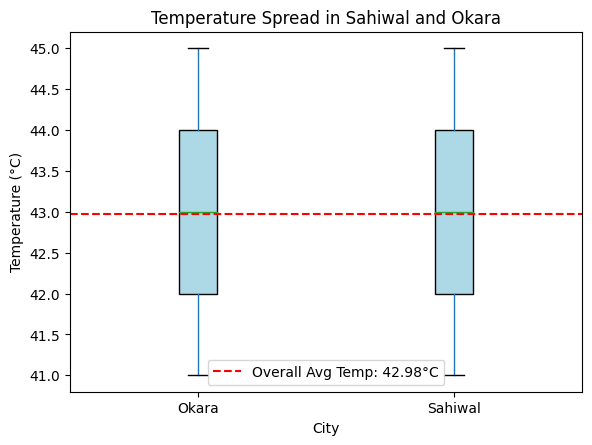

In [18]:
plt.figure(figsize=(10, 6))
weather_data.boxplot(column='Temperature_C', by='City', grid=False, patch_artist=True,
                     boxprops=dict(facecolor='lightblue'))

plt.title('Temperature Spread in Sahiwal and Okara')
plt.suptitle('')
plt.xlabel('City')
plt.ylabel('Temperature (°C)')
plt.axhline(y=average_temp, color='red', linestyle='--', label=f'Overall Avg Temp: {average_temp:.2f}°C')
plt.legend()
plt.show()

## **Plotting the hottest days**

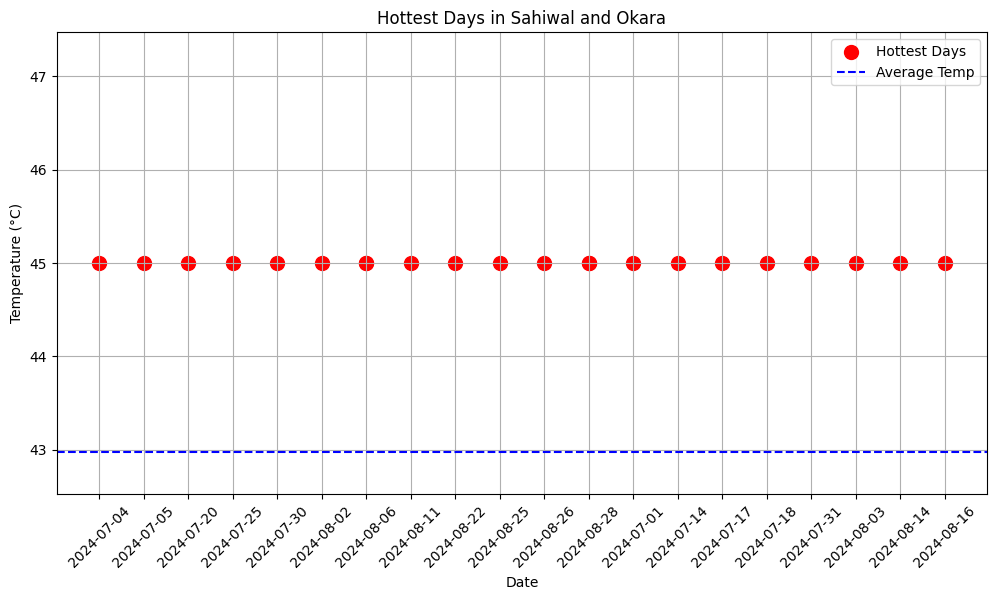

In [20]:

max_temperature = weather_data['Temperature_C'].max()

hottest_days = weather_data[weather_data['Temperature_C'] == max_temperature]

plt.figure(figsize=(12, 6))
plt.scatter(hottest_days['Date'], hottest_days['Temperature_C'], color='red', s=100, label='Hottest Days')

plt.axhline(y=weather_data['Temperature_C'].mean(), color='blue', linestyle='--', label='Average Temp')

plt.title('Hottest Days in Sahiwal and Okara')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()